In [1]:
# 建模与评估
# Statsmodels包
# 读取本地鸢尾花数据，并给列名
import pandas as pd
PATH = './'
df = pd.read_csv(PATH+'iris.data',names=['sepal length','sepal width','petal length','petal width', 'class'])

In [2]:
import matplotlib.pyplot as plt

Text(0.5, 1.02, 'Setosa Sepal Width vs. Sepal Length')

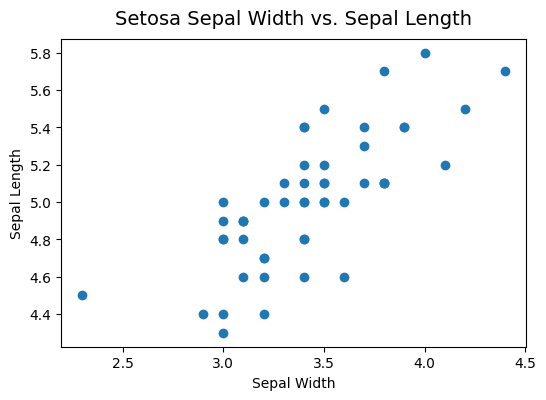

In [3]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(df['sepal width'][:50], df['sepal length'][:50])
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.set_title('Setosa Sepal Width vs. Sepal Length', fontsize=14,
y=1.02)

In [4]:
# !pip install statsmodels
import statsmodels.api as sm

In [5]:
y = df['sepal length'][:50]
x = df['sepal width'][:50]
X = sm.add_constant(x)

results = sm.OLS(y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal length   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     60.52
Date:                Sun, 25 Jun 2023   Prob (F-statistic):           4.75e-10
Time:                        11:19:48   Log-Likelihood:                 2.0879
No. Observations:                  50   AIC:                           -0.1759
Df Residuals:                      48   BIC:                             3.648
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.6447      0.305      8.660      

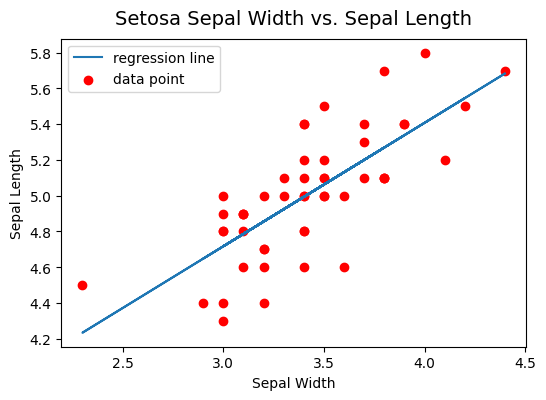

In [6]:
# 绘制回归线:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, results.fittedvalues, label='regression line')
ax.scatter(x, y, label='data point', color='r')
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.set_title('Setosa Sepal Width vs. Sepal Length', fontsize=14,
y=1.02)
ax.legend(loc=2)

In [7]:
# skikit-learn
# 随机森林分类器
from sklearn.ensemble import RandomForestClassifier
# 模块train_test_split 会打乱数据的先后顺序
from sklearn.model_selection import train_test_split

In [8]:
# 实例化分类器，10个决策树，5层深度
clf = RandomForestClassifier(max_depth=5, n_estimators=10)
X = df.iloc[:,:4]
y = df.iloc[:,4]
# 划分数据集，0.3代表30%划分为测试集
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=22)
print("训练集形状:", X_train.shape, y_train.shape)
print("测试集形状:", X_test.shape, y_test.shape)

训练集形状: (105, 4) (105,)
测试集形状: (45, 4) (45,)


In [9]:
# 训练
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
rf = pd.DataFrame(list(zip(y_pred, y_test)), columns=['predicted','actual'])

In [10]:
rf['correct'] = rf.apply(lambda r: 1 if r['predicted'] == r['actual'] else 0, axis=1)
rf.head()

,predicted,actual,correct
0,Iris-setosa,Iris-setosa,1
1,Iris-virginica,Iris-virginica,1
2,Iris-versicolor,Iris-versicolor,1
3,Iris-virginica,Iris-virginica,1
4,Iris-versicolor,Iris-versicolor,1


In [11]:
c = rf['correct'].sum()/rf['correct'].count()
print("准确率：",c)

准确率： 0.9111111111111111


In [12]:
import numpy as np
f_importances = clf.feature_importances_f_names = df.columns[:4]
f_std = np.std([tree.feature_importances_ for tree in
clf.estimators_], axis=0)

In [13]:
# 支持向量机
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [14]:
ovrc = OneVsRestClassifier(SVC(kernel='linear'))

In [15]:
X = df.iloc[:,:4]
y = df.iloc[:,4]
# 划分数据集，0.3代表30%划分为测试集
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=22)
print("训练集形状:", X_train.shape, y_train.shape)
print("测试集形状:", X_test.shape, y_test.shape)

训练集形状: (105, 4) (105,)
测试集形状: (45, 4) (45,)


In [16]:
# 训练与测试
ovrc.fit(X_train,y_train)
y_pred = ovrc.predict(X_test)
rf = pd.DataFrame(list(zip(y_pred, y_test)), columns=['predicted','actual'])
rf['correct'] = rf.apply(lambda r: 1 if r['predicted'] == r['actual'] else 0, axis=1)
rf.head()

,predicted,actual,correct
0,Iris-setosa,Iris-setosa,1
1,Iris-virginica,Iris-virginica,1
2,Iris-versicolor,Iris-versicolor,1
3,Iris-virginica,Iris-virginica,1
4,Iris-versicolor,Iris-versicolor,1


In [17]:
c = rf['correct'].sum()/rf['correct'].count()
print("准确率：",c)

准确率： 0.9333333333333333
